<a href="https://colab.research.google.com/github/llillard99/LinearReg/blob/master/Sports_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [247]:
df = pd.read_csv('/content/gdrive/My Drive/cbb.csv')
df = df[[x for x in list(df) if x != 'CONF']]
df = df[[x for x in list(df) if x != 'WAB']]
df['Win%'] = df['W'] / df['G']

In [248]:
df['EFG_Ratio'] = (df['EFG_O'] - df['EFG_D']) / (df['EFG_O'] + df['EFG_D'])
df['3P_ODRatio'] = (df['3P_O'] - df['3P_D']) / (df['3P_O'] + df['3P_D'])
df['2P_ODRatio'] = (df['2P_O'] - df['2P_D']) / (df['2P_O'] + df['2P_D'])
df['FTR_Ratio'] = (df['FTR'] - df['FTRD']) / (df['FTR'] + df['FTRD'])

df = df[[x for x in list(df) if x != 'EFG_O']]
df = df[[x for x in list(df) if x != 'EFG_D']]
df = df[[x for x in list(df) if x != 'W']]
df = df[[x for x in list(df) if x != 'TORD']]
df = df[[x for x in list(df) if x != '2P_O']]
df = df[[x for x in list(df) if x != '2P_D']]
df = df[[x for x in list(df) if x != '3P_O']]
df = df[[x for x in list(df) if x != '3P_D']]
df = df[[x for x in list(df) if x != 'TFR']]
df = df[[x for x in list(df) if x != 'TFRD']]
df = df[[x for x in list(df) if x != 'ADJ_T_Scaled']]


In [249]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(df[['ADJOE', 'ADJDE', 'BARTHAG', 'Win%', 'EFG_Ratio', '3P_ODRatio', '3P_ODRatio', 'FTR_Ratio', 'TOR', 'ORB', 'DRB']])

In [250]:
df_scaled = pd.DataFrame(data = scaled)

In [251]:
inputvars = ['ADJOE', 'ADJDE', 'BARTHAG', 'Win%', 'EFG_Ratio', '3P_ODRatio', '3P_ODRatio', 'FTR_Ratio', 'TOR', 'ORB', 'DRB']

columns = [x +'_scaled' for x in inputvars]

In [252]:
df_scaled = pd.DataFrame(data = scaled, columns = columns)
df_scaled

,ADJOE_scaled,ADJDE_scaled,BARTHAG_scaled,Win%_scaled,EFG_Ratio_scaled,3P_ODRatio_scaled,3P_ODRatio_scaled,FTR_Ratio_scaled,TOR_scaled,ORB_scaled,DRB_scaled
0,0.889313,0.2725,0.968152,0.846711,0.618546,0.392009,0.392009,0.588390,0.218978,0.948339,0.527273
1,1.000000,0.2400,0.991398,0.923684,0.700824,0.496250,0.496250,0.922676,0.000000,0.630996,0.240909
2,0.719466,0.1600,0.952176,0.846711,0.673227,0.615780,0.615780,0.557810,0.116788,0.387454,0.295455
3,0.734733,0.0300,0.985049,0.837258,0.833173,0.821214,0.821214,0.452292,0.386861,0.457565,0.468182
4,0.784351,0.0575,0.988326,0.973684,1.000000,0.916791,0.916791,0.838151,0.277372,0.553506,0.354545
...,...,...,...,...,...,...,...,...,...,...,...
1752,0.658397,0.2675,0.876907,0.645113,0.622198,0.546837,0.546837,0.659294,0.496350,0.697417,0.404545
1753,0.786260,0.3150,0.922069,0.821053,0.512008,0.457317,0.457317,0.631851,0.401460,0.800738,0.563636
1754,0.879771,0.2800,0.963748,0.883772,0.702043,0.584441,0.584441,0.500802,0.248175,0.612546,0.536364
1755,0.776718,0.2625,0.938146,0.791729,0.817078,0.841940,0.841940,0.703240,0.343066,0.630996,0.345455


In [253]:
df = df[[x for x in list(df) if x != 'ADJ_T']]

In [254]:
df = df[[x for x in list(df) if x != 'FTR_Ratio_scaled']]
df = df[[x for x in list(df) if x != 'ORB']]

In [255]:
##df.loc[df['POSTSEASON'] == 'Champions', 'POSTSEASON'] = 1
##df['POSTSEASON'] = df['POSTSEASON'].str.replace(r'[^\d.]+', '')


In [256]:
df = df.join(df_scaled)
df

,TEAM,G,ADJOE,ADJDE,BARTHAG,TOR,DRB,FTR,FTRD,POSTSEASON,SEED,YEAR,Win%,EFG_Ratio,3P_ODRatio,2P_ODRatio,FTR_Ratio,ADJOE_scaled,ADJDE_scaled,BARTHAG_scaled,Win%_scaled,EFG_Ratio_scaled,3P_ODRatio_scaled,3P_ODRatio_scaled,FTR_Ratio_scaled,TOR_scaled,ORB_scaled,DRB_scaled
0,North Carolina,40,123.3,94.9,0.9531,15.4,30.0,32.3,30.4,2ND,1.0,2016,0.825000,0.044687,-0.050798,0.094416,0.030303,0.889313,0.2725,0.968152,0.846711,0.618546,0.392009,0.392009,0.588390,0.218978,0.948339,0.527273
1,Wisconsin,40,129.1,93.6,0.9758,12.4,23.7,36.2,22.4,2ND,1.0,2015,0.900000,0.069268,-0.013514,0.101508,0.235495,1.000000,0.2400,0.991398,0.923684,0.700824,0.496250,0.496250,0.922676,0.000000,0.630996,0.240909
2,Michigan,40,114.4,90.4,0.9375,14.0,24.9,30.7,30.0,2ND,3.0,2018,0.825000,0.061024,0.029240,0.077833,0.011532,0.719466,0.1600,0.952176,0.846711,0.673227,0.615780,0.615780,0.557810,0.116788,0.387454,0.295455
3,Texas Tech,38,115.2,85.2,0.9696,17.7,28.7,32.9,36.6,2ND,3.0,2019,0.815789,0.108808,0.102719,0.115100,-0.053237,0.734733,0.0300,0.985049,0.837258,0.833173,0.821214,0.821214,0.452292,0.386861,0.457565,0.468182
4,Gonzaga,39,117.8,86.3,0.9728,16.2,26.2,39.0,26.9,2ND,1.0,2017,0.948718,0.158649,0.136905,0.169263,0.183612,0.784351,0.0575,0.988326,0.973684,1.000000,0.916791,0.916791,0.838151,0.277372,0.553506,0.354545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,35,111.2,94.7,0.8640,19.2,27.3,32.0,27.6,S16,7.0,2018,0.628571,0.045778,0.004580,0.069246,0.073826,0.658397,0.2675,0.876907,0.645113,0.622198,0.546837,0.546837,0.659294,0.496350,0.697417,0.404545
1753,LSU,35,117.9,96.6,0.9081,17.9,30.8,37.1,33.1,S16,3.0,2019,0.800000,0.012859,-0.027439,0.034213,0.056980,0.786260,0.3150,0.922069,0.821053,0.512008,0.457317,0.457317,0.631851,0.401460,0.800738,0.563636
1754,Tennessee,36,122.8,95.2,0.9488,15.8,30.2,33.3,34.9,S16,2.0,2019,0.861111,0.069632,0.018031,0.106893,-0.023460,0.879771,0.2800,0.963748,0.883772,0.702043,0.584441,0.584441,0.500802,0.248175,0.612546,0.536364
1755,Gonzaga,35,117.4,94.5,0.9238,17.1,26.0,34.4,28.1,S16,11.0,2016,0.771429,0.104000,0.110132,0.100304,0.100800,0.776718,0.2625,0.938146,0.791729,0.817078,0.841940,0.841940,0.703240,0.343066,0.630996,0.345455


In [257]:
df2015 = df.loc[df.YEAR == 2015]
df2016 = df.loc[df.YEAR == 2016]
df2017 = df.loc[df.YEAR == 2017]
df2018 = df.loc[df.YEAR == 2018]
df2019 = df.loc[df.YEAR == 2019]

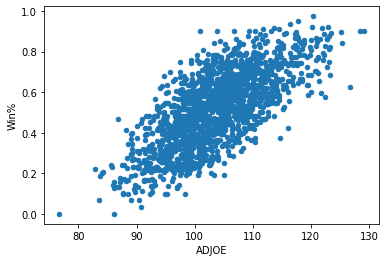

In [259]:
df.plot(kind= 'scatter', x = 'ADJOE', y = 'Win%')

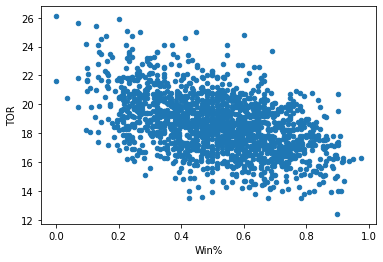

In [260]:
df.plot(kind= 'scatter', x = 'Win%', y = 'TOR')

In [261]:
from sklearn.linear_model import LinearRegression
 
LR=LinearRegression()
 
X = df[['BARTHAG_scaled', 'EFG_Ratio_scaled', '3P_ODRatio_scaled', '3P_ODRatio_scaled', 'FTR_Ratio_scaled', 'ADJOE_scaled', 'ADJOE_scaled', 'TOR_scaled', 'ORB_scaled', 'DRB_scaled']]
y = df['Win%']

LR.fit(X, y)

df['prediction'] = LR.predict(X)
df.head(20)

,TEAM,G,ADJOE,ADJDE,BARTHAG,TOR,DRB,FTR,FTRD,POSTSEASON,SEED,YEAR,Win%,EFG_Ratio,3P_ODRatio,2P_ODRatio,FTR_Ratio,ADJOE_scaled,ADJDE_scaled,BARTHAG_scaled,Win%_scaled,EFG_Ratio_scaled,3P_ODRatio_scaled,3P_ODRatio_scaled,FTR_Ratio_scaled,TOR_scaled,ORB_scaled,DRB_scaled,prediction
0,North Carolina,40,123.3,94.9,0.9531,15.4,30.0,32.3,30.4,2ND,1.0,2016,0.825000,0.044687,-0.050798,0.094416,0.030303,0.889313,0.2725,0.968152,0.846711,0.618546,0.392009,0.392009,0.588390,0.218978,0.948339,0.527273,0.772216
1,Wisconsin,40,129.1,93.6,0.9758,12.4,23.7,36.2,22.4,2ND,1.0,2015,0.900000,0.069268,-0.013514,0.101508,0.235495,1.000000,0.2400,0.991398,0.923684,0.700824,0.496250,0.496250,0.922676,0.000000,0.630996,0.240909,0.867940
2,Michigan,40,114.4,90.4,0.9375,14.0,24.9,30.7,30.0,2ND,3.0,2018,0.825000,0.061024,0.029240,0.077833,0.011532,0.719466,0.1600,0.952176,0.846711,0.673227,0.615780,0.615780,0.557810,0.116788,0.387454,0.295455,0.777892
3,Texas Tech,38,115.2,85.2,0.9696,17.7,28.7,32.9,36.6,2ND,3.0,2019,0.815789,0.108808,0.102719,0.115100,-0.053237,0.734733,0.0300,0.985049,0.837258,0.833173,0.821214,0.821214,0.452292,0.386861,0.457565,0.468182,0.805643
4,Gonzaga,39,117.8,86.3,0.9728,16.2,26.2,39.0,26.9,2ND,1.0,2017,0.948718,0.158649,0.136905,0.169263,0.183612,0.784351,0.0575,0.988326,0.973684,1.000000,0.916791,0.916791,0.838151,0.277372,0.553506,0.354545,1.022524
5,Duke,39,125.2,90.6,0.9764,16.3,30.2,39.8,23.9,Champions,1.0,2015,0.897436,0.097963,0.104137,0.093933,0.249608,0.925573,0.1650,0.992012,0.921053,0.796872,0.825179,0.825179,0.945667,0.284672,0.767528,0.536364,0.886072
6,Virginia,38,123.0,89.9,0.9736,14.7,25.4,29.1,26.3,Champions,1.0,2019,0.921053,0.105105,0.154971,0.069246,0.050542,0.883588,0.1475,0.989145,0.945291,0.820777,0.967300,0.967300,0.621362,0.167883,0.568266,0.318182,0.918202
7,North Carolina,39,121.0,91.5,0.9615,16.2,25.0,34.3,31.6,Champions,1.0,2017,0.846154,0.036072,0.023055,0.048304,0.040971,0.845420,0.1875,0.976754,0.868421,0.589709,0.598488,0.598488,0.605770,0.277372,0.970480,0.300000,0.805756
8,Villanova,40,123.1,90.9,0.9703,16.3,29.4,34.1,30.0,Champions,2.0,2016,0.875000,0.091440,0.032810,0.131034,0.063963,0.885496,0.1725,0.985765,0.898026,0.775036,0.625763,0.625763,0.643226,0.284672,0.487085,0.500000,0.765255
9,Villanova,40,128.4,94.1,0.9725,15.0,27.1,29.4,26.7,Champions,1.0,2018,0.900000,0.101852,0.116992,0.092593,0.048128,0.986641,0.2525,0.988018,0.923684,0.809888,0.861118,0.861118,0.617430,0.189781,0.538745,0.395455,0.851642


In [262]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_squared_error(df['Win%'],df['prediction'])
 
np.sqrt(mean_squared_error(df['Win%'],df['prediction']))

0.08437037661557063

In [263]:
df = df.loc[~df['POSTSEASON'].isnull()]

In [264]:
df

,TEAM,G,ADJOE,ADJDE,BARTHAG,TOR,DRB,FTR,FTRD,POSTSEASON,SEED,YEAR,Win%,EFG_Ratio,3P_ODRatio,2P_ODRatio,FTR_Ratio,ADJOE_scaled,ADJDE_scaled,BARTHAG_scaled,Win%_scaled,EFG_Ratio_scaled,3P_ODRatio_scaled,3P_ODRatio_scaled,FTR_Ratio_scaled,TOR_scaled,ORB_scaled,DRB_scaled,prediction
0,North Carolina,40,123.3,94.9,0.9531,15.4,30.0,32.3,30.4,2ND,1.0,2016,0.825000,0.044687,-0.050798,0.094416,0.030303,0.889313,0.2725,0.968152,0.846711,0.618546,0.392009,0.392009,0.588390,0.218978,0.948339,0.527273,0.772216
1,Wisconsin,40,129.1,93.6,0.9758,12.4,23.7,36.2,22.4,2ND,1.0,2015,0.900000,0.069268,-0.013514,0.101508,0.235495,1.000000,0.2400,0.991398,0.923684,0.700824,0.496250,0.496250,0.922676,0.000000,0.630996,0.240909,0.867940
2,Michigan,40,114.4,90.4,0.9375,14.0,24.9,30.7,30.0,2ND,3.0,2018,0.825000,0.061024,0.029240,0.077833,0.011532,0.719466,0.1600,0.952176,0.846711,0.673227,0.615780,0.615780,0.557810,0.116788,0.387454,0.295455,0.777892
3,Texas Tech,38,115.2,85.2,0.9696,17.7,28.7,32.9,36.6,2ND,3.0,2019,0.815789,0.108808,0.102719,0.115100,-0.053237,0.734733,0.0300,0.985049,0.837258,0.833173,0.821214,0.821214,0.452292,0.386861,0.457565,0.468182,0.805643
4,Gonzaga,39,117.8,86.3,0.9728,16.2,26.2,39.0,26.9,2ND,1.0,2017,0.948718,0.158649,0.136905,0.169263,0.183612,0.784351,0.0575,0.988326,0.973684,1.000000,0.916791,0.916791,0.838151,0.277372,0.553506,0.354545,1.022524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,35,111.2,94.7,0.8640,19.2,27.3,32.0,27.6,S16,7.0,2018,0.628571,0.045778,0.004580,0.069246,0.073826,0.658397,0.2675,0.876907,0.645113,0.622198,0.546837,0.546837,0.659294,0.496350,0.697417,0.404545,0.691763
1753,LSU,35,117.9,96.6,0.9081,17.9,30.8,37.1,33.1,S16,3.0,2019,0.800000,0.012859,-0.027439,0.034213,0.056980,0.786260,0.3150,0.922069,0.821053,0.512008,0.457317,0.457317,0.631851,0.401460,0.800738,0.563636,0.622119
1754,Tennessee,36,122.8,95.2,0.9488,15.8,30.2,33.3,34.9,S16,2.0,2019,0.861111,0.069632,0.018031,0.106893,-0.023460,0.879771,0.2800,0.963748,0.883772,0.702043,0.584441,0.584441,0.500802,0.248175,0.612546,0.536364,0.741796
1755,Gonzaga,35,117.4,94.5,0.9238,17.1,26.0,34.4,28.1,S16,11.0,2016,0.771429,0.104000,0.110132,0.100304,0.100800,0.776718,0.2625,0.938146,0.791729,0.817078,0.841940,0.841940,0.703240,0.343066,0.630996,0.345455,0.879821


In [265]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df[['BARTHAG_scaled', 'EFG_Ratio_scaled', '3P_ODRatio_scaled', '3P_ODRatio_scaled', 'FTR_Ratio_scaled', 'ADJOE_scaled', 'ADJOE_scaled', 'TOR_scaled', 'ORB_scaled', 'DRB_scaled']]
y = df['POSTSEASON']

KNN.fit(X, y)
 
df['prediction2'] = KNN.predict(X)
df[['POSTSEASON','prediction2']].sample(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,POSTSEASON,prediction2
1501,R32,R64
1605,R64,R64
1622,R64,R64
1547,R64,R64
1708,R68,R68
1579,R64,R64
1583,R64,R64
32,F4,E8
1573,R64,R64
1658,R64,R64


In [266]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
print(accuracy_score(df['POSTSEASON'],df['prediction2']))
print(recall_score(df['POSTSEASON'],df['prediction2'],average='macro'))
print(f1_score(df['POSTSEASON'],df['prediction2'],average='macro'))

0.638235294117647
0.41953125
0.4516241874616616
